# An Intro to the Newport Data Project, By Example
**Paul Opperman  
December 31, 2017  
paul@newportdataproject.org**

-----------------
## Introduction
The Newport Data Project looks at our community through data.  Although many people think of data as a bunch of numbers, data are really any piece of information that describes something. According to [Wikipedia](https://en.wikipedia.org/wiki/Data),
> Data as a general concept refers to the fact that some existing information or knowledge is represented or coded in some form suitable for better usage or processing.

Newport Data Project's work focuses on the **story** that information can tell to answer a question or solve a problem. This document walks through the major steps of acquiring and using data, using the sidewalk map as an example:

* Ask a question
* Find information
    * From real world observations
    * From secondary sources, like the web (and [this list of data portals](https://github.com/NewportDataProject/data/wiki/Data-Portals))
* Organize the information in a useful format, and share it
    * Spreadsheet or delimited file (i.e. .csv)
    * Geospatial file (e.g. ESRI shapefiles, GeoJSON)
    * others...
* Explore the data to answer the question
* **Ask new questions!**

#### A note about technology
A few different tools are used in this example, ranging from a pen and paper to spreadsheets, to gps tracking, in-depth geographic information software and custom computer code.  A few things to keep in mind:
* Finding data is often the lowest-tech step, but the most challenging and most important part of the process
* Not everything can or *should* be done with code
* **The answers are in the data, not the tools**

### **Let's get started!**

--------------------------
## Question: *Where are the sidewalks?*
If you've walked around Newport, you may have noticed the, um, *quirky* qualities of our sidewalks.  You probably know that they are only on one side of some streets, end halfway down a block on others, and just don't go places one might expect.  But probably no one can draw a detailed accurate picture, or quantify how many streets don't have sidewalks. To begin to answer this question completely, we need to document the sidewalks and organize the information into one place. That is, we need to build a **dataset**.

### Collecting Data
The central part of our question is: *"where?"*  This suggests that we are looking for something we can put on a map. In other words, it's **geospatial data**.
 Fortunately, for this question we can just take a walk and collect data ourselves!
We can collect [gps data](https://docs.google.com/spreadsheets/d/1xnmynA02Rw2WVEccHJBs98ildCgHwee3Bp9MeZszCkw/edit?usp=sharing) with a smartphone using apps like [this](https://play.google.com/store/apps/details?id=com.mendhak.gpslogger) to record a walk along a sidewalk.

<img src="./files/gps_trace.png" style="width: 500px;"/>

And we can take geotagged photos where we need more detailed records.

<img src="./files/taggedphoto.png" style="width: 500px;"/>


We can also use publicly available (and appropriately licensed) information to help build our dataset. Bing has aerial imagery that is open for use, so we can find sidewalks from a computer.

<img src="./files/bingaerialview.png" style="width: 500px;"/>

### Compiling a Dataset
With all the information we've collected, we need to get it organized in a useful format.  Since we collected sidewalk data in a few different formats, we compile all the information by hand using the [Geographic Information System (GIS)](https://en.wikipedia.org/wiki/Geographic_information_system) software [QGIS](https://qgis.org/en/site/) by drawing the lines representing sidewalks.  This software puts all the information we collected into a standard geospatial data format that can be used by many different applications (you can check it out [here](https://raw.githubusercontent.com/NewportDataPortal/sidewalk-map/development/npt-sidewalks.geojson)).  Assuming we've done a good job cataloging sidewalks in Newport, we have a dataset that answers our question. At this point we save the map and post it to the data portal for people to use.

<img src="./files/qgis.png" style="width: 500px;"/>

-----------------------------

## Working with the Dataset
Now that we have a dataset of sidewalks in Newport, we can start working with it.  There are lots of different ways to explore the data (like [QGIS](https://qgis.org/en/site/) or [Tableau](https://public.tableau.com/en-us/s/)).  For this example we'll be using a [python](https://www.python.org) library called [geopandas](http://geopandas.org/index.html).  The first thing we need to do is import the python tools we're going to use.

In [1]:
import requests
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt

### Read the data
We start by using the [requests](http://docs.python-requests.org/en/master/) package to read the data from the [Newport Data Portal](https://github.com/NewportDataPortal/sidewalk-map).  This code pulls the data and then shows us what we got.

In [2]:
# read the sidewalk map file from the data portal
sidewalk_response = requests.get('https://raw.githubusercontent.com/NewportDataPortal/sidewalk-map/development/npt-sidewalks.geojson')

# look at a piece of the raw dataset
print(str(sidewalk_response.json())[:2000] + " ...")

{'type': 'FeatureCollection', 'name': 'npt-sidewalks', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': [{'type': 'Feature', 'properties': {'id': None, 'name': 'Russell Ave N', 'surface': None, 'verified': 'Y'}, 'geometry': {'type': 'MultiLineString', 'coordinates': [[[-71.30878556556762, 41.50218933958298], [-71.30638296571627, 41.50352105296312]]]}}, {'type': 'Feature', 'properties': {'id': None, 'name': 'Russell Ave S', 'surface': None, 'verified': 'Y'}, 'geometry': {'type': 'MultiLineString', 'coordinates': [[[-71.3088062419863, 41.50208713719201], [-71.3063846779822, 41.50341166671006]]]}}, {'type': 'Feature', 'properties': {'id': None, 'name': 'Peckham Ave S', 'surface': None, 'verified': 'Y'}, 'geometry': {'type': 'MultiLineString', 'coordinates': [[[-71.3063846779822, 41.50341166671006], [-71.30421145715064, 41.50253036388983]]]}}, {'type': 'Feature', 'properties': {'id': None, 'name': 'Peckham Ave N', 'surface': None, 'verified': 'Y

[JSON](https://www.json.org/) strings are nice for storing and transmitting data, but there are much better formats to work in once we have it loaded.  The code below coverts the data we downloaded into a handy [geopandas package](http://geopandas.org/data_structures.html#geodataframe).  Compare the geopandas data output below with the raw JSON above.

In [3]:
# Nothing to see here, just some hacky python code to get the dataset formatted so it can be read in by geopandas. 
# reference https://gis.stackexchange.com/questions/225586/reading-raw-data-into-geopandas
b = bytes(sidewalk_response.content)
with fiona.BytesCollection(b) as f:
    crs = f.crs
    sidewalk_gdf = gpd.GeoDataFrame.from_features(f, crs=crs)

# take a peek at the data
sidewalk_gdf[30:40]

,geometry,id,name,surface,verified
30,(LINESTRING (-71.31213770134329 41.49157802556...,None,Broadway,crosswalk,None
31,(LINESTRING (-71.31556538335198 41.49386008446...,None,Warner St,None,None
32,(LINESTRING (-71.30762567096855 41.49918905152...,None,None,Warner St,None
33,(LINESTRING (-71.31556538335198 41.49386008446...,None,Farewell St,None,N
34,(LINESTRING (-71.31695557914654 41.49866943387...,None,Van Zandt Ave,None,None
35,(LINESTRING (-71.32171550832534 41.49849697471...,None,Van Zandt Ave,None,None
36,(LINESTRING (-71.3218198453973 41.499352080209...,None,Washington St,None,None
37,(LINESTRING (-71.31940450214556 41.49736699657...,None,Battery St,None,None
38,(LINESTRING (-71.32053062295655 41.49941854802...,None,2nd St,None,None
39,(LINESTRING (-71.31939970503882 41.49150166213...,None,2nd St,None,None


### Clean the data
That's much easier to read, right? You can start to understand the data, and find errors or inconsistencies. (*Hint: take a look at row 32.*)  Let's fix that.

In [4]:
sidewalk_gdf.iloc[32]['name'] = 'Warner St'
sidewalk_gdf.iloc[32]['surface'] = 'None'
sidewalk_gdf[30:40]

,geometry,id,name,surface,verified
30,(LINESTRING (-71.31213770134329 41.49157802556...,None,Broadway,crosswalk,None
31,(LINESTRING (-71.31556538335198 41.49386008446...,None,Warner St,None,None
32,(LINESTRING (-71.30762567096855 41.49918905152...,None,Warner St,None,None
33,(LINESTRING (-71.31556538335198 41.49386008446...,None,Farewell St,None,N
34,(LINESTRING (-71.31695557914654 41.49866943387...,None,Van Zandt Ave,None,None
35,(LINESTRING (-71.32171550832534 41.49849697471...,None,Van Zandt Ave,None,None
36,(LINESTRING (-71.3218198453973 41.499352080209...,None,Washington St,None,None
37,(LINESTRING (-71.31940450214556 41.49736699657...,None,Battery St,None,None
38,(LINESTRING (-71.32053062295655 41.49941854802...,None,2nd St,None,None
39,(LINESTRING (-71.31939970503882 41.49150166213...,None,2nd St,None,None


### Visualize the data
Often, large datasets are easier to understand when they are visualized in some way.  Data processing libraries like geopandas make it easy to work with your data and generate plots.  For example, we can plot a basic map of the sidewalks with this simple code:

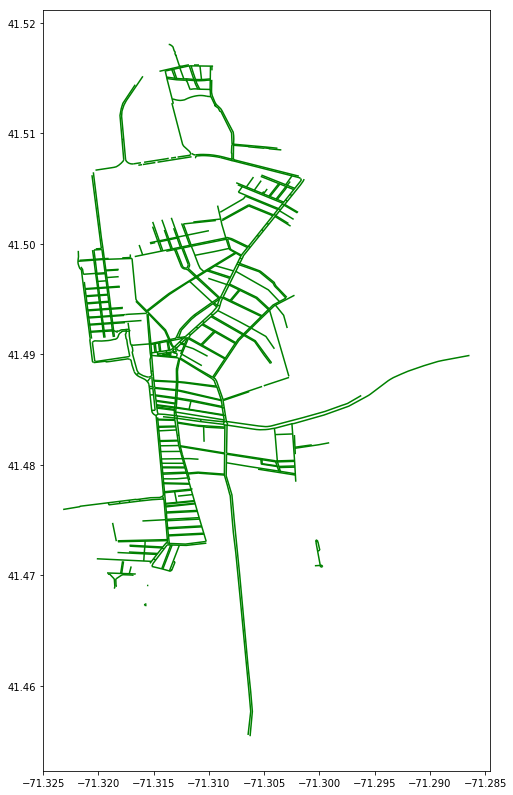

In [5]:
# plot a map
sidewalk_gdf.plot(figsize=(28,14), color='g')
plt.show()

## Another question: *How many people live near the sidewalks?*
It's great that we know where the sidewalks are, and can draw them on a map.  But how can we start applying it to our community?  Sidewalks are for people, so let's see where the people are.  

### Finding more datasets
For this question, we need two pieces of information - *how many* people there are in a *location*. We are looking for another geospatial dataset, but this time we need the additional information of the number of people.  
A good place to start looking for new data is the internet. You can see what we get from Google with the search "population in newport ri" [here](https://www.google.com/search?source=hp&ei=jwZIWqH4EYeJ0gKX94GwDw&q=population+in+newport+ri&oq=population+in+newport+ri&gs_l=psy-ab.3..33i22i29i30k1.48.5022.0.6047.31.20.1.0.0.0.374.2521.0j5j5j1.11.0....0...1c.1.64.psy-ab..19.12.2524...0j0i131k1j0i3k1j0i10k1j0i22i30k1.0.K6l_X2roohE).  The top results are for total population which may be useful in some cases, but we want to know where people live within the city. If you dig far enough into the [US Census Bureau](https://www.census.gov), you can find the [2010 Census summary file 1](https://www.census.gov/2010census/news/press-kits/summary-file-1.html) data.  In raw form, this is a very complex dataset (the technical documentation for this dataset is a [730 page pdf](https://www.census.gov/prod/cen2010/doc/sf1.pdf)).  Fortunately, [RIGIS](http://www.rigis.org/datasets/us-census-2010-summary-file-1-indicators) did some of the hard work for us and has a usable dataset posted online, with an api for us to access.  We can load it in the same way we did with the sidewalk map.

In [6]:
# download census data from rigis api
rigis_api_path = "https://opendata.arcgis.com/datasets/7489a7517b8e46728db2a26d9a258c39_0.geojson"
census_response = requests.get(rigis_api_path)
b = bytes(census_response.content)
with fiona.BytesCollection(b) as f:
    crs = f.crs
    census_gdf = gpd.GeoDataFrame.from_features(f, crs=crs)

# print the first 50 entries
census_gdf.head(10)

,AGE10,AGE11,AGE12_D,AGE12_N,AGE13_D,AGE13_N,AGE14,AGE15,AGE1_D,AGE1_N,...,POP9_N,RIMUNI10,RIREP02,RISEN04,STATEFP10,Shape_Area,Shape_Length,TRACTCE10,WATONLY,geometry
0,43.5,37.5,4,2,4,2,4,8,36,28,...,0,Barrington town,66,32,44,1.575324e-06,0.005979,030400,0,POLYGON ((-71.30740448099994 41.72228152300005...
1,41.5,46.2,8,3,8,5,8,15,48,34,...,0,Barrington town,66,32,44,1.646180e-06,0.006398,030400,0,POLYGON ((-71.30619848099997 41.72582752400007...
2,47.5,45.8,22,14,22,8,22,22,53,33,...,0,Barrington town,66,32,44,1.639291e-05,0.023459,030400,0,POLYGON ((-71.29410647699996 41.72411452400007...
3,53.0,40.5,3,2,3,1,3,5,19,14,...,0,Barrington town,66,32,44,1.906543e-06,0.005579,030400,0,POLYGON ((-71.29248847599996 41.72743952500008...
4,51.0,43.0,12,9,12,3,12,14,44,30,...,0,Barrington town,66,32,44,3.899447e-06,0.008026,030400,0,POLYGON ((-71.29499847799997 41.73224352500006...
5,32.5,47.5,6,2,6,4,6,7,26,20,...,0,Barrington town,66,32,44,1.572912e-06,0.005004,030100,0,POLYGON ((-71.34264449499994 41.75578252900004...
6,42.5,41.5,19,7,19,12,19,28,76,49,...,0,Barrington town,66,32,44,6.028053e-06,0.009774,030400,0,POLYGON ((-71.29108447599998 41.72969652500007...
7,0.0,0.0,0,0,0,0,0,0,0,0,...,0,Barrington town,66,32,44,5.165212e-08,0.001414,030200,0,POLYGON ((-71.32637848899998 41.75491552900007...
8,44.8,56.0,4,2,4,2,4,6,41,35,...,0,Barrington town,66,32,44,4.807665e-06,0.016073,030100,0,POLYGON ((-71.35263149799994 41.74819152600003...
9,20.5,53.5,13,1,13,12,13,14,41,27,...,7,Barrington town,66,32,44,4.242209e-06,0.008741,030100,0,POLYGON ((-71.34419749599994 41.75344252800005...


### Processing the dataset
There is a lot of data here!  We only want total population data for Newport, so we can extract that from the whole dataset by filtering on the column `RIMUNI10`.

In [7]:
# filter and extract Newport city data entries
newport_census = census_gdf[census_gdf['RIMUNI10']=='Newport city']

# print the first 50 entries
newport_census.head(10)

,AGE10,AGE11,AGE12_D,AGE12_N,AGE13_D,AGE13_N,AGE14,AGE15,AGE1_D,AGE1_N,...,POP9_N,RIMUNI10,RIREP02,RISEN04,STATEFP10,Shape_Area,Shape_Length,TRACTCE10,WATONLY,geometry
5287,0.0,0.0,0,0,0,0,0,0,0,0,...,0,Newport city,75,13,44,4.509642e-06,0.010869,040900,0,POLYGON ((-71.33314547599997 41.46774447200005...
5288,0.0,0.0,0,0,0,0,0,0,0,0,...,0,Newport city,75,13,44,1.061961e-07,0.001312,040900,0,POLYGON ((-71.33415947699996 41.46668747200005...
5289,0.0,0.0,0,0,0,0,0,0,0,0,...,0,Newport city,75,13,44,1.273086e-06,0.005161,040900,0,POLYGON ((-71.30687746799998 41.46543247300008...
5290,47.5,39.5,1,0,1,1,1,6,23,17,...,0,Newport city,73,12,44,1.079691e-06,0.004588,040700,0,POLYGON ((-71.29971346699995 41.50030548000007...
5291,43.5,40.5,3,1,3,2,3,5,27,22,...,0,Newport city,72,12,44,6.389524e-06,0.028731,040700,0,POLYGON ((-71.29258746499994 41.49640448000008...
5292,65.5,54.5,1,0,1,1,1,1,8,7,...,0,Newport city,75,13,44,9.598047e-07,0.005453,041100,0,POLYGON ((-71.32166847399998 41.49585847800006...
5293,0.0,0.0,0,0,0,0,0,0,0,0,...,0,Newport city,73,13,44,3.943194e-08,0.001104,041200,0,POLYGON ((-71.32034847399996 41.51062948100008...
5294,47.5,48.0,0,0,0,0,0,0,14,14,...,0,Newport city,75,13,44,1.749128e-06,0.008066,041000,0,POLYGON ((-71.31682247199996 41.48215547600006...
5295,39.8,51.5,4,1,4,3,4,9,49,40,...,1,Newport city,73,12,44,1.942269e-06,0.005999,040700,0,POLYGON ((-71.29821946599998 41.49927348000006...
5296,44.0,35.5,6,4,6,2,6,7,41,34,...,2,Newport city,73,13,44,6.300002e-06,0.013357,040500,0,POLYGON ((-71.30473346899998 41.50739248100007...


To find out which column represents the total population in each census block, we should check out the **metadata**, which you can find [here](https://www.arcgis.com/sharing/rest/content/items/7489a7517b8e46728db2a26d9a258c39/info/metadata/metadata.xml?format=default&output=html).  (*Hint: it's POP1*).  Now we know how to find the information to answer our second question.  

*There's a lot more information in the dataset. Explore the metatdata to see what else you could find out.*

### Plot the data
We can now build a map showing how populations are connected to sidewalks.  The population data is represented as a [choropleth](https://en.wikipedia.org/wiki/Choropleth_map) map, where darker colors indicate higher populations in the area (note, we aren't normalizing the population based on land area, so it's not the best visual representation of the data).  We'll add the streets to the map as well to get an indication of where sidewalks *aren't*. 

*(We're glossing over the steps taken to find the streets dataset, but it is basically searching data portals and the internet at large. Now that we have it, we'll keep it for future use).*

In [8]:
# get roads data from RIGIS
rigis_roads_api = "https://opendata.arcgis.com/datasets/30943d3301474c1abbf79912cd11b25c_0.geojson"
roads_response = requests.get(rigis_roads_api)
b = bytes(roads_response.content)
with fiona.BytesCollection(b) as f:
    crs = f.crs
    roads_gdf = gpd.GeoDataFrame.from_features(f, crs=crs)

# filter roads for just newport
newport_roads = roads_gdf[roads_gdf['LTWN']=='NEWPORT']

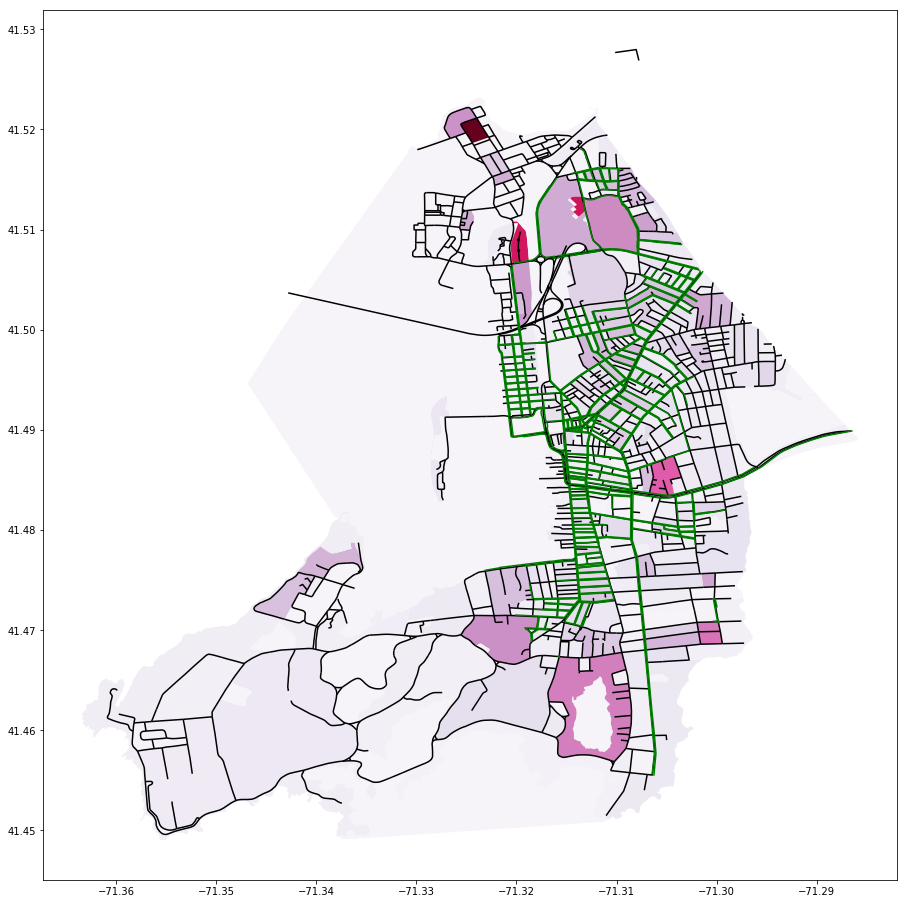

In [9]:
# plot the census choropleth map as the base, and overlay the sidewalk map.
base_plot = newport_census.plot(column='POP1', cmap='PuRd', figsize=(16,16))  # base layer
rds_plot = newport_roads.plot(ax=base_plot, color='k')  # add roads layer
sidewalk_gdf.plot(ax=rds_plot, color='g')  # add sidewalk layer
plt.show()

We could probably start telling a story with this map!
#### Data limitations
One thing to keep in mind is that datasets are rarely perfect. They may be outdated, or may have errors or missing data. For example, the bridge to Goat Island has a sidewalk, but the sidewalk map data doesn't capture it (for now), and the census is from 2010.  This doesn't make the entire dataset invalid, but it impacts the conclusions we can draw from it. If a dataset surprises you, try to figure out *why*.

------------------
## Conclusions
This document follows the question *"Where are the sidewalks?"*, taken from real-world, day-to-day experience through the steps to find, collect, and analyze the data to answer it.  This is the approach we try to use in the Newport Data Project.  Hopefully you were able to follow along to see how the walks around the city turned into the map above.  This example only scratched the surface - there are more questions to ask like *"Can people walk safely where they need to go?"*, and *"Are these sidewalks accessible to everyone?"* We just need to follow the same process with these new questions.  

Here are the things you should remember:
### Keep asking questions
This is an iterative process. No single dataset has all the answers, and when you start exploring data you'll find gaps. **The information is out there!** You might be able to find another dataset to merge, or you may have to go collect the data yourself.  Start with a new question and work from there.
### Collecting data is the hardest part, so sharing is good!
People, companies, and governments spend a vast amount of resources to collect data.  In this example we used a combination of real world observations and the work of others to build our dataset.  We publish our sidewalk data online to help the next group tell their story.
### Information comes in many forms - use them all!
Data is not just numbers. It can be a collection of pictures, a list of names and addresses, or the text of the legal code.  Tools exist to work with all types of data - the important thing is to make the data **readable** by the tools.
### The answers are in the data, not the tools
Our goal is to learn about our community, and take what we learn to solve problems and meet challenges. **Data is the link to the community.** We are building a comprehensive toolbox, and we can use it to find new insights in old data, and collect new data that's never been looked at before.  Different tools can give us different insights, and no one tool can find all the answers, but **the right tool won't work with the wrong data**.  Don't let tools get in the way of the data.
